# Convolutional Neural Networks

## Machine learning on images

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Tensor Math

In [7]:
# 2 groups, of 3 groups, of 4 groups, of 5 elements
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [8]:
A

array([[[[3, 0, 4, 2, 9],
         [6, 2, 5, 1, 2],
         [2, 5, 3, 1, 0],
         [5, 7, 0, 4, 3]],

        [[0, 2, 1, 6, 5],
         [7, 6, 3, 0, 1],
         [6, 2, 5, 2, 2],
         [8, 1, 6, 5, 5]],

        [[9, 5, 5, 2, 7],
         [1, 7, 9, 7, 7],
         [0, 1, 1, 8, 4],
         [9, 4, 0, 6, 5]]],


       [[[6, 8, 5, 5, 3],
         [1, 5, 4, 4, 4],
         [6, 2, 0, 2, 8],
         [6, 1, 5, 3, 4]],

        [[5, 6, 9, 8, 4],
         [8, 4, 5, 5, 8],
         [4, 3, 7, 9, 4],
         [1, 6, 8, 2, 1]],

        [[5, 4, 1, 6, 0],
         [9, 9, 7, 8, 4],
         [5, 9, 3, 0, 6],
         [6, 3, 5, 1, 0]]]])

In [9]:
A.flatten().shape

(120,)

In [10]:
A[0, 1, 0, 3]

6

In [11]:
B

array([[8, 5, 8],
       [5, 5, 6]])

#### A random colored image

In [13]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
print(img, img.shape)

(array([[[232, 181, 131],
        [117,  11, 102],
        [ 99, 218, 196],
        [  2,  24,  19]],

       [[153, 173, 192],
        [ 57,  12,  33],
        [221,  88,  22],
        [119, 163,  43]],

       [[ 70, 224,  36],
        [ 47, 223, 166],
        [193, 238, 216],
        [246, 160, 136]],

       [[ 15, 181, 230],
        [102, 199, 155],
        [ 67, 155, 155],
        [226, 220, 113]]], dtype=uint8), (4, 4, 3))


In [15]:
img[:, : , 0]

array([[232, 117,  99,   2],
       [153,  57, 221, 119],
       [ 70,  47, 193, 246],
       [ 15, 102,  67, 226]], dtype=uint8)

Text(0.5,1,'Blue channel')

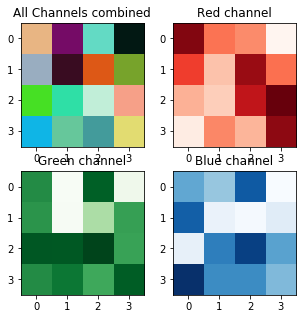

In [16]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

### Tensor operations

In [17]:
2 * A

array([[[[ 6,  0,  8,  4, 18],
         [12,  4, 10,  2,  4],
         [ 4, 10,  6,  2,  0],
         [10, 14,  0,  8,  6]],

        [[ 0,  4,  2, 12, 10],
         [14, 12,  6,  0,  2],
         [12,  4, 10,  4,  4],
         [16,  2, 12, 10, 10]],

        [[18, 10, 10,  4, 14],
         [ 2, 14, 18, 14, 14],
         [ 0,  2,  2, 16,  8],
         [18,  8,  0, 12, 10]]],


       [[[12, 16, 10, 10,  6],
         [ 2, 10,  8,  8,  8],
         [12,  4,  0,  4, 16],
         [12,  2, 10,  6,  8]],

        [[10, 12, 18, 16,  8],
         [16,  8, 10, 10, 16],
         [ 8,  6, 14, 18,  8],
         [ 2, 12, 16,  4,  2]],

        [[10,  8,  2, 12,  0],
         [18, 18, 14, 16,  8],
         [10, 18,  6,  0, 12],
         [12,  6, 10,  2,  0]]]])

In [18]:
# element wise sum
A + A

array([[[[ 6,  0,  8,  4, 18],
         [12,  4, 10,  2,  4],
         [ 4, 10,  6,  2,  0],
         [10, 14,  0,  8,  6]],

        [[ 0,  4,  2, 12, 10],
         [14, 12,  6,  0,  2],
         [12,  4, 10,  4,  4],
         [16,  2, 12, 10, 10]],

        [[18, 10, 10,  4, 14],
         [ 2, 14, 18, 14, 14],
         [ 0,  2,  2, 16,  8],
         [18,  8,  0, 12, 10]]],


       [[[12, 16, 10, 10,  6],
         [ 2, 10,  8,  8,  8],
         [12,  4,  0,  4, 16],
         [12,  2, 10,  6,  8]],

        [[10, 12, 18, 16,  8],
         [16,  8, 10, 10, 16],
         [ 8,  6, 14, 18,  8],
         [ 2, 12, 16,  4,  2]],

        [[10,  8,  2, 12,  0],
         [18, 18, 14, 16,  8],
         [10, 18,  6,  0, 12],
         [12,  6, 10,  2,  0]]]])

In [19]:
B

array([[8, 5, 8],
       [5, 5, 6]])

In [20]:
A.shape

(2, 3, 4, 5)

In [21]:
B.shape

(2, 3)

In [23]:
# do a dot multiplication, and specify which axis we are contracting on
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tensordot.html 
out = np.tensordot(A, B, axes=([0, 1], [0, 1]))
print out, out.shape

[[181 144 153 163 188]
 [190 201 214 157 161]
 [126 137 110 137 138]
 [223 146 125 136 114]] (4, 5)


In [24]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

In [25]:
np.tensordot(A, B, axes=([0], [0]))

array([[[[ 54,  45,  60],
         [ 40,  40,  48],
         [ 57,  45,  62],
         [ 41,  35,  46],
         [ 87,  60,  90]],

        [[ 53,  35,  54],
         [ 41,  35,  46],
         [ 60,  45,  64],
         [ 28,  25,  32],
         [ 36,  30,  40]],

        [[ 46,  40,  52],
         [ 50,  35,  52],
         [ 24,  15,  24],
         [ 18,  15,  20],
         [ 40,  40,  48]],

        [[ 70,  55,  76],
         [ 61,  40,  62],
         [ 25,  25,  30],
         [ 47,  35,  50],
         [ 44,  35,  48]]],


       [[[ 25,  25,  30],
         [ 46,  40,  52],
         [ 53,  50,  62],
         [ 88,  70,  96],
         [ 60,  45,  64]],

        [[ 96,  75, 104],
         [ 68,  50,  72],
         [ 49,  40,  54],
         [ 25,  25,  30],
         [ 48,  45,  56]],

        [[ 68,  50,  72],
         [ 31,  25,  34],
         [ 75,  60,  82],
         [ 61,  55,  70],
         [ 36,  30,  40]],

        [[ 69,  45,  70],
         [ 38,  35,  44],
         [ 88,  70,  9